First, I will plot the integrand of the function.

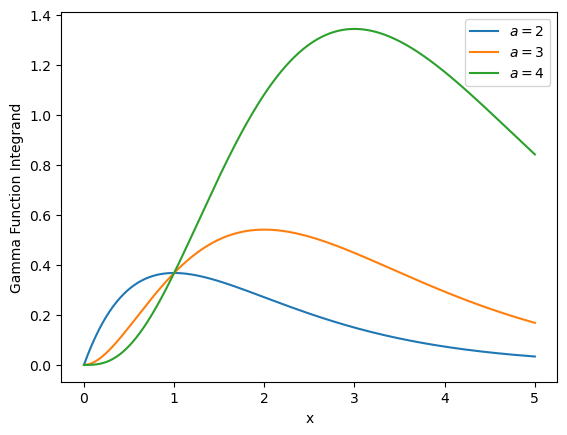

In [15]:
#Import modules
import math
import numpy as np
import matplotlib.pyplot as plt

def f(x, a):
    return x**(a-1) * np.exp(-x)

x = np.linspace(0, 5, 500)

#Actual plotting
fig, ax = plt.subplots()
ax.plot(x, f(x, 2), label=r'$a=2$')
ax.plot(x, f(x, 3), label=r'$a=3$')
ax.plot(x, f(x, 4), label=r'$a=4$')
ax.set(xlabel='x', ylabel='Gamma Function Integrand')
ax.legend(loc='best')
plt.show()

To find the maximum, just differentiate the integrand and set it equal to 0.
$$\newline$$
$$(a-1) x^{a-2} e^{-x} + x^{a-1} (-e^{-x}) = 0$$
$$\newline$$
$$(a-1) x^{a-2} - x^{a-1} = 0$$
$$\newline$$
$$x^{a-1} ((a-1)x^{-1} - 1) = 0$$
$$\newline$$
The maximum isn't at $x = 0$, so
$$\newline$$
$$(a-1)x^{-1} - 1 = 0$$
$$\newline$$
$$x = a - 1$$
$$\newline$$
The maximum is at $x = a - 1$.

When we change variable to $z$, if $x = a-1$, then $z = \frac{1}{2}$.
$$\newline$$
$$c + a - 1 = 2a - 2$$
$$\newline$$
$$c = a - 1$$

Also, $x = \frac{cz}{1-z}$ and $dx = \frac{c}{(1-z)^2} dz$.

Now, we can derive a new expression when we have $x^{a-1} = e^{(a-1)\operatorname{ln}{x}}$.
$$\newline$$
$$\int_{0}^{\infty} e^{(a-1) \operatorname{ln}{x} -x} \,dx$$
$$\newline$$
$$\int_{0}^{1} e^{(a-1) \operatorname{ln}{\frac{(a-1)z}{1-z}} -\frac{(a-1)z}{1-z}} \frac{a-1}{(1-z)^2} \,dz$$
$$\newline$$
This expression is better because it makes it easier to see how the integrand changes based on $x$ or $z$ without needing to worry about two terms of different types.

In [13]:
#Make function in integrand
def g(z, a):
    part_one = math.exp((a-1)*math.log((a-1)*z/(1-z)) - (a-1)*z/(1-z))
    part_two = (a-1)/((1-z)**2)
    return part_one * part_two

#Make gamma function with Simpson's rule
#h = 2h from notes on Canvas
#Can't compute when z = 0 or 1, so iterate between those
def gamma(a):
    integrand = 0
    h = 0.001
    for i in range(1, 999):
        integrand += h/2 * (g(i*h, a)/3 + g(i*h+h/2, a)*4/3 + g((i+1)*h, a)/3)
    return integrand

print(gamma(1.5))
#This works!

0.8862194617392009


In [14]:
#Try when a is an integer
print(gamma(3))
print(gamma(6))
print(gamma(10))

1.9999999973292966
120.00000000000006
362879.9999999996


The results come very close to the actual values, especially when $a = 6$ and $a = 10$.